# Installing Libs

In [1]:
!pip install catboost xgboost lightgbm statsmodels -q
!pip install gdown -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 38.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.9/253.9 MB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 130.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.5/10.5 MB 135.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.9/232.9 kB 24.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.3/47.3 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.5/322.5 MB 11.8 MB/s eta 0:00:00


# Imports

In [2]:
import warnings
from collections import Counter

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import catboost
import xgboost as xgb
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import LinearRegression

from sklearn.metrics import (
  r2_score,
  mean_absolute_error,
  mean_absolute_percentage_error,
  mean_squared_error
)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
warnings.filterwarnings('ignore')

# Downloading Dataset

In [3]:
!gdown 15ZnSVNZJq87NxBe8QQg75wCpst0uEWoV

Downloading...
From (original): https://drive.google.com/uc?id=15ZnSVNZJq87NxBe8QQg75wCpst0uEWoV
From (redirected): https://drive.google.com/uc?id=15ZnSVNZJq87NxBe8QQg75wCpst0uEWoV&confirm=t&uuid=1db3d230-97ba-4b36-9fa5-7fec4a1814a7
To: /content/dataset.csv
100% 851M/851M [00:03<00:00, 254MB/s]


# Loading Data

In [4]:
df = pd.read_csv(
    "/content/dataset.csv",
).drop(['Unnamed: 0'], axis = 1)

In [5]:
df.shape

(2017824, 38)

In [6]:
df.tail(10)

,county,is_business,product_type,target,is_consumption,datetime,year,datediff_in_days,hour,hour_sine,...,temperature_max_f,dewpoint_min_f,dewpoint_mean_f,dewpoint_max_f,direct_solar_radiation_min_f,direct_solar_radiation_mean_f,direct_solar_radiation_max_f,surface_solar_radiation_downwards_min_f,surface_solar_radiation_downwards_mean_f,surface_solar_radiation_downwards_max_f
2017814,15,0,1,0.004,0,2023-05-31 23:00:00,2023,637,23,-0.258819,...,12.518091,5.69082,6.748584,7.131494,-0.733333,-0.335111,0.12,0.0,0.0,0.0
2017815,15,0,1,42.401,1,2023-05-31 23:00:00,2023,637,23,-0.258819,...,12.518091,5.69082,6.748584,7.131494,-0.733333,-0.335111,0.12,0.0,0.0,0.0
2017816,15,0,3,2.287,0,2023-05-31 23:00:00,2023,637,23,-0.258819,...,12.518091,5.69082,6.748584,7.131494,-0.733333,-0.335111,0.12,0.0,0.0,0.0
2017817,15,0,3,117.332,1,2023-05-31 23:00:00,2023,637,23,-0.258819,...,12.518091,5.69082,6.748584,7.131494,-0.733333,-0.335111,0.12,0.0,0.0,0.0
2017818,15,1,0,0.000,0,2023-05-31 23:00:00,2023,637,23,-0.258819,...,12.518091,5.69082,6.748584,7.131494,-0.733333,-0.335111,0.12,0.0,0.0,0.0
2017819,15,1,0,197.233,1,2023-05-31 23:00:00,2023,637,23,-0.258819,...,12.518091,5.69082,6.748584,7.131494,-0.733333,-0.335111,0.12,0.0,0.0,0.0
2017820,15,1,1,0.000,0,2023-05-31 23:00:00,2023,637,23,-0.258819,...,12.518091,5.69082,6.748584,7.131494,-0.733333,-0.335111,0.12,0.0,0.0,0.0
2017821,15,1,1,28.404,1,2023-05-31 23:00:00,2023,637,23,-0.258819,...,12.518091,5.69082,6.748584,7.131494,-0.733333,-0.335111,0.12,0.0,0.0,0.0
2017822,15,1,3,0.000,0,2023-05-31 23:00:00,2023,637,23,-0.258819,...,12.518091,5.69082,6.748584,7.131494,-0.733333,-0.335111,0.12,0.0,0.0,0.0
2017823,15,1,3,196.240,1,2023-05-31 23:00:00,2023,637,23,-0.258819,...,12.518091,5.69082,6.748584,7.131494,-0.733333,-0.335111,0.12,0.0,0.0,0.0


In [7]:
df.pop('datetime')
df.shape

(2017824, 37)

In [8]:
numeric_columns = df.select_dtypes(include='number').columns.tolist()
print("Numeric columns:", numeric_columns)

Numeric columns: ['county', 'is_business', 'product_type', 'target', 'is_consumption', 'year', 'datediff_in_days', 'hour', 'hour_sine', 'hour_cosine', 'dayofweek', 'dayofweek_sine', 'dayofweek_cosine', 'week', 'week_sine', 'week_cosine', 'month', 'month_sine', 'month_cosine', 'target_2days_ago', 'euros_per_mwh', 'lowest_price_per_mwh', 'highest_price_per_mwh', 'eic_count', 'installed_capacity', 'temperature_min_f', 'temperature_mean_f', 'temperature_max_f', 'dewpoint_min_f', 'dewpoint_mean_f', 'dewpoint_max_f', 'direct_solar_radiation_min_f', 'direct_solar_radiation_mean_f', 'direct_solar_radiation_max_f', 'surface_solar_radiation_downwards_min_f', 'surface_solar_radiation_downwards_mean_f', 'surface_solar_radiation_downwards_max_f']


In [9]:
len(numeric_columns)

37

In [10]:
df = df.dropna()

In [11]:
df.describe()

,county,is_business,product_type,target,is_consumption,year,datediff_in_days,hour,hour_sine,hour_cosine,...,temperature_max_f,dewpoint_min_f,dewpoint_mean_f,dewpoint_max_f,direct_solar_radiation_min_f,direct_solar_radiation_mean_f,direct_solar_radiation_max_f,surface_solar_radiation_downwards_min_f,surface_solar_radiation_downwards_mean_f,surface_solar_radiation_downwards_max_f
count,1.977882e+06,1.977882e+06,1.977882e+06,1.977882e+06,1977882.0,1.977882e+06,1.977882e+06,1.977882e+06,1.977882e+06,1.977882e+06,...,1.977882e+06,1.977882e+06,1.977882e+06,1.977882e+06,1.977882e+06,1.977882e+06,1.977882e+06,1.977882e+06,1.977882e+06,1.977882e+06
mean,7.221361e+00,5.295523e-01,1.881989e+00,2.753090e+02,0.5,2.022060e+03,3.228079e+02,1.150573e+01,-4.380398e-04,-4.865253e-04,...,6.696572e+00,8.100803e-01,2.012729e+00,3.157187e+00,9.717604e+01,1.464342e+02,1.949711e+02,8.961584e+01,1.095940e+02,1.269121e+02
std,4.782612e+00,4.991260e-01,1.081836e+00,9.169910e+02,0.5,6.433623e-01,1.819878e+02,6.920857e+00,7.071302e-01,7.070834e-01,...,8.159366e+00,7.466080e+00,7.231417e+00,7.131365e+00,2.027127e+02,2.427494e+02,2.884440e+02,1.608458e+02,1.832147e+02,2.038292e+02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,2.021000e+03,2.000000e+00,0.000000e+00,-1.000000e+00,-1.000000e+00,...,-2.104445e+01,-2.968357e+01,-2.487019e+01,-2.312015e+01,-7.733333e-01,-3.437500e-01,-2.813889e-01,-3.258333e-01,-1.826389e-01,-1.244444e-01
25%,3.000000e+00,0.000000e+00,1.000000e+00,3.650000e-01,0.0,2.022000e+03,1.670000e+02,6.000000e+00,-7.071068e-01,-7.071068e-01,...,6.971680e-01,-4.182227e+00,-2.934839e+00,-1.720435e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,7.000000e+00,1.000000e+00,2.000000e+00,3.118600e+01,0.5,2.022000e+03,3.240000e+02,1.200000e+01,0.000000e+00,-1.836970e-16,...,5.933496e+00,5.785156e-01,1.525232e+00,2.510645e+00,0.000000e+00,3.022222e-02,2.844444e-01,3.805556e-01,7.481997e-01,1.164167e+00
75%,1.100000e+01,1.000000e+00,3.000000e+00,1.754518e+02,1.0,2.022000e+03,4.790000e+02,1.800000e+01,7.071068e-01,7.071068e-01,...,1.213699e+01,5.987207e+00,6.933740e+00,7.995996e+00,5.519111e+01,2.173451e+02,3.818533e+02,1.030222e+02,1.470346e+02,1.849406e+02
max,1.500000e+01,1.000000e+00,3.000000e+00,1.548027e+04,1.0,2.023000e+03,6.370000e+02,2.300000e+01,1.000000e+00,1.000000e+00,...,3.181069e+01,2.084463e+01,2.087002e+01,2.368057e+01,9.100844e+02,9.144176e+02,9.544222e+02,8.237189e+02,8.289692e+02,8.487144e+02


In [12]:
# df = df.sample(100)

# Scaling

In [13]:
scaler = MinMaxScaler()

df[df.columns] = scaler.fit_transform(df[df.columns])

In [14]:
df

,county,is_business,product_type,target,is_consumption,year,datediff_in_days,hour,hour_sine,hour_cosine,...,temperature_max_f,dewpoint_min_f,dewpoint_mean_f,dewpoint_max_f,direct_solar_radiation_min_f,direct_solar_radiation_mean_f,direct_solar_radiation_max_f,surface_solar_radiation_downwards_min_f,surface_solar_radiation_downwards_mean_f,surface_solar_radiation_downwards_max_f
5856,0.0,0.0,0.333333,0.000051,0.0,0.0,0.0,0.0,0.50000,1.000000,...,0.691905,0.771373,0.766764,0.736851,0.000849,0.000376,0.000295,0.000395,0.00022,0.000147
5857,0.0,0.0,0.333333,0.006920,1.0,0.0,0.0,0.0,0.50000,1.000000,...,0.691905,0.771373,0.766764,0.736851,0.000849,0.000376,0.000295,0.000395,0.00022,0.000147
5858,0.0,0.0,0.666667,0.000000,0.0,0.0,0.0,0.0,0.50000,1.000000,...,0.691905,0.771373,0.766764,0.736851,0.000849,0.000376,0.000295,0.000395,0.00022,0.000147
5859,0.0,0.0,0.666667,0.001268,1.0,0.0,0.0,0.0,0.50000,1.000000,...,0.691905,0.771373,0.766764,0.736851,0.000849,0.000376,0.000295,0.000395,0.00022,0.000147
5860,0.0,0.0,1.000000,0.000063,0.0,0.0,0.0,0.0,0.50000,1.000000,...,0.691905,0.771373,0.766764,0.736851,0.000849,0.000376,0.000295,0.000395,0.00022,0.000147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017819,1.0,1.0,0.000000,0.012741,1.0,1.0,1.0,1.0,0.37059,0.982963,...,0.634991,0.700092,0.691269,0.646393,0.000044,0.000009,0.000420,0.000395,0.00022,0.000147
2017820,1.0,1.0,0.333333,0.000000,0.0,1.0,1.0,1.0,0.37059,0.982963,...,0.634991,0.700092,0.691269,0.646393,0.000044,0.000009,0.000420,0.000395,0.00022,0.000147
2017821,1.0,1.0,0.333333,0.001835,1.0,1.0,1.0,1.0,0.37059,0.982963,...,0.634991,0.700092,0.691269,0.646393,0.000044,0.000009,0.000420,0.000395,0.00022,0.000147
2017822,1.0,1.0,1.000000,0.000000,0.0,1.0,1.0,1.0,0.37059,0.982963,...,0.634991,0.700092,0.691269,0.646393,0.000044,0.000009,0.000420,0.000395,0.00022,0.000147


In [15]:
target = df.pop('target')
df = df.dropna()

# Feature Selection

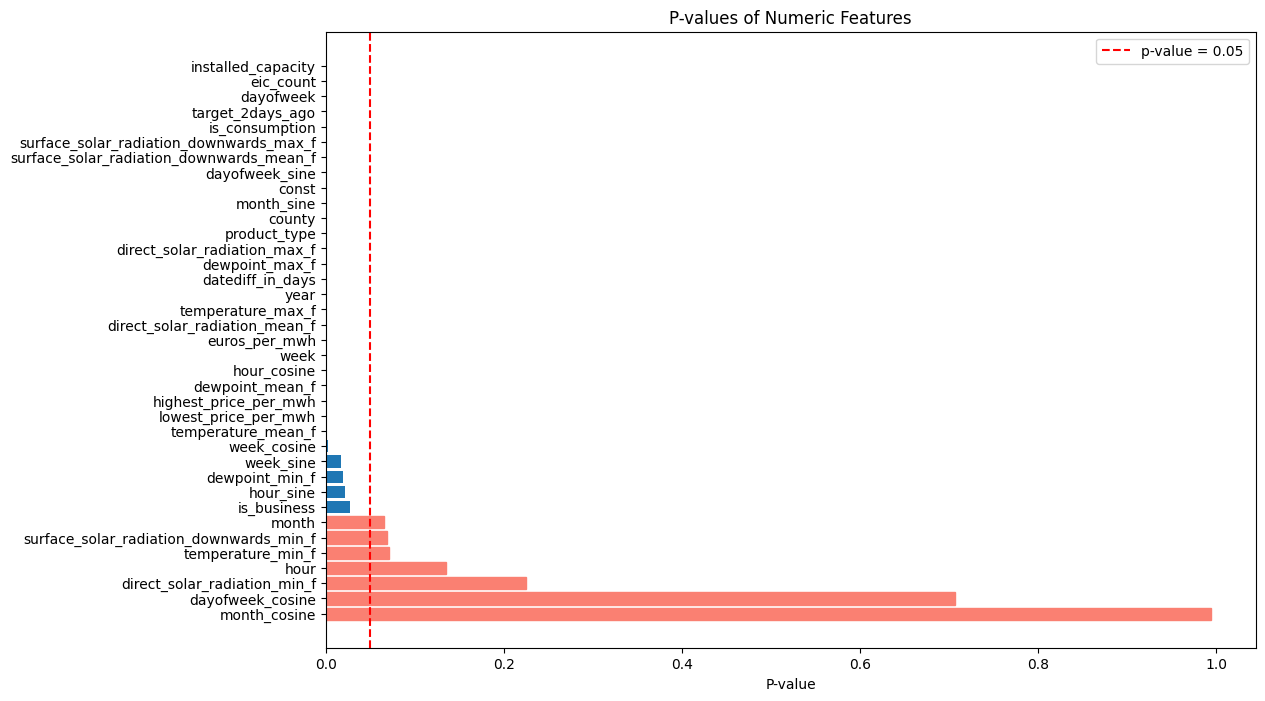

In [16]:
import statsmodels.api as sm

X_with_const = sm.add_constant(df)

model = sm.OLS(target, X_with_const)
results = model.fit()

p_values = results.pvalues

plt.figure(figsize=(12, 8))
p_values_sorted = p_values.sort_values(ascending=False)
bars = plt.barh(p_values_sorted.index, p_values_sorted.values)
plt.axvline(x=0.05, color='red', linestyle='--', label='p-value = 0.05')
plt.xlabel('P-value')
plt.title('P-values of Numeric Features')
plt.legend()

for bar, p_val in zip(bars, p_values_sorted.values):
    if p_val > 0.05:
        bar.set_color('salmon')

plt.show()


significant_features = p_values[p_values < 0.05].index.tolist()

if 'const' in significant_features:
    significant_features.remove('const')

In [17]:
df = df[significant_features]

print(f"{len(significant_features)} Selected features based on p-test:", significant_features)

29 Selected features based on p-test: ['county', 'is_business', 'product_type', 'is_consumption', 'year', 'datediff_in_days', 'hour_sine', 'hour_cosine', 'dayofweek', 'dayofweek_sine', 'week', 'week_sine', 'week_cosine', 'month_sine', 'target_2days_ago', 'euros_per_mwh', 'lowest_price_per_mwh', 'highest_price_per_mwh', 'eic_count', 'installed_capacity', 'temperature_mean_f', 'temperature_max_f', 'dewpoint_min_f', 'dewpoint_mean_f', 'dewpoint_max_f', 'direct_solar_radiation_mean_f', 'direct_solar_radiation_max_f', 'surface_solar_radiation_downwards_mean_f', 'surface_solar_radiation_downwards_max_f']


# Train Test Split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.20, shuffle = False)

# Logistic Regression

## Training

In [19]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


metrics = {
    'MSE': mean_squared_error(y_test, y_pred),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
    'MAE': mean_absolute_error(y_test, y_pred),
    'R2': r2_score(y_test, y_pred),
}

for key, value in metrics.items():
    print(f"{key}: {value:.4f}")

metrics_dict = {
    'Linear Regression': metrics
}

MSE: 0.0006
RMSE: 0.0243
MAE: 0.0081
R2: 0.8709


In [20]:
import gc
gc.collect()

0

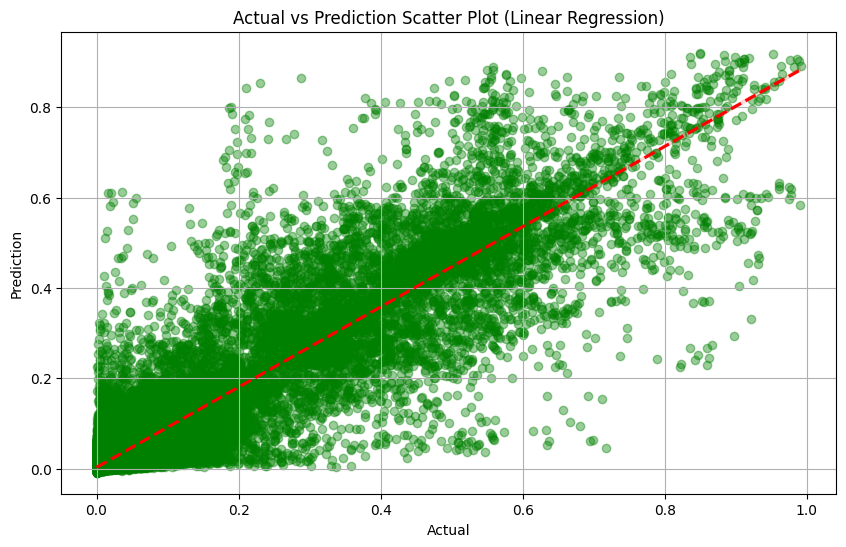

In [21]:
plt.figure(figsize=(10, 6))
sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha':0.4, 'color': 'Green'}, line_kws={'color': 'red', 'linestyle': '--'})
plt.title('Actual vs Prediction Scatter Plot (Linear Regression)')
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.grid(True)
plt.show()

# XGBoost


## Training

In [22]:
model = xgb.XGBRegressor(random_state=42, n_jobs = -1)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

metrics = {
    'MSE': mean_squared_error(y_test, y_pred),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
    'MAE': mean_absolute_error(y_test, y_pred),
    'R2': r2_score(y_test, y_pred),
}

for key, value in metrics.items():
    print(f"{key}: {value:.4f}")

metrics_dict['XGBoost'] = metrics

MSE: 0.0003
RMSE: 0.0170
MAE: 0.0053
R2: 0.9365


## Feature Explaination

### Feature Importance

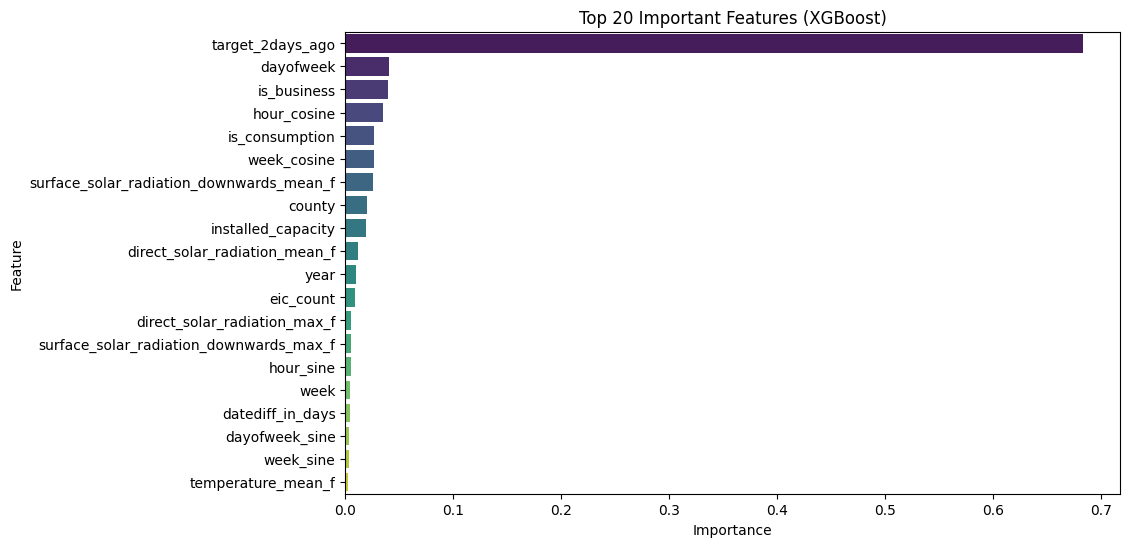

In [23]:
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': model.feature_importances_
})

top_20 = feature_importance.sort_values('Importance', ascending=False).head(20)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_20, palette='viridis')
plt.title('Top 20 Important Features (XGBoost)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

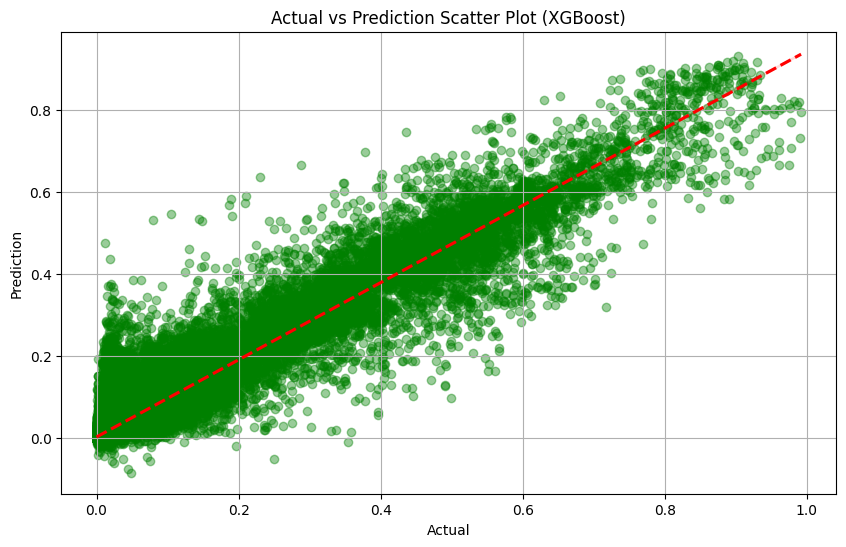

In [24]:
plt.figure(figsize=(10, 6))
sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha':0.4, 'color': 'Green'}, line_kws={'color': 'red', 'linestyle': '--'})
plt.title('Actual vs Prediction Scatter Plot (XGBoost)')
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.grid(True)
plt.show()

# CatBoost


## Training

In [25]:
model = CatBoostRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
metrics = {
    'MSE': mean_squared_error(y_test, y_pred),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
    'MAE': mean_absolute_error(y_test, y_pred),
    'R2': r2_score(y_test, y_pred),
}

for key, value in metrics.items():
    print(f"{key}: {value:.4f}")

metrics_dict['CatBoost'] = metrics

Learning rate set to 0.13112
0:	learn: 0.0504595	total: 71ms	remaining: 1m 10s
1:	learn: 0.0448962	total: 94ms	remaining: 46.9s
2:	learn: 0.0401000	total: 118ms	remaining: 39.3s
3:	learn: 0.0360073	total: 143ms	remaining: 35.5s
4:	learn: 0.0325440	total: 166ms	remaining: 33.1s
5:	learn: 0.0295977	total: 190ms	remaining: 31.5s
6:	learn: 0.0270347	total: 215ms	remaining: 30.5s
7:	learn: 0.0248908	total: 240ms	remaining: 29.8s
8:	learn: 0.0230718	total: 265ms	remaining: 29.2s
9:	learn: 0.0214911	total: 289ms	remaining: 28.6s
10:	learn: 0.0200482	total: 314ms	remaining: 28.2s
11:	learn: 0.0189345	total: 340ms	remaining: 28s
12:	learn: 0.0179221	total: 366ms	remaining: 27.8s
13:	learn: 0.0171445	total: 390ms	remaining: 27.5s
14:	learn: 0.0164272	total: 416ms	remaining: 27.3s
15:	learn: 0.0158302	total: 441ms	remaining: 27.1s
16:	learn: 0.0153848	total: 468ms	remaining: 27s
17:	learn: 0.0149428	total: 494ms	remaining: 27s
18:	learn: 0.0145286	total: 521ms	remaining: 26.9s
19:	learn: 0.014217

## Feature Explaination

### Feature Importance

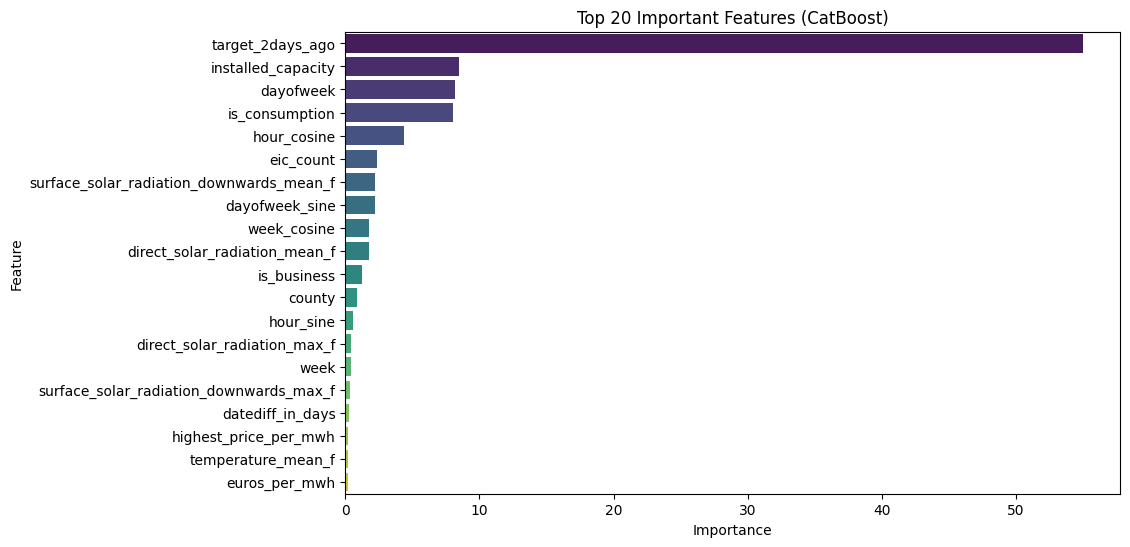

In [26]:
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': model.feature_importances_
})

top_20 = feature_importance.sort_values('Importance', ascending=False).head(20)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_20, palette='viridis')
plt.title('Top 20 Important Features (CatBoost)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

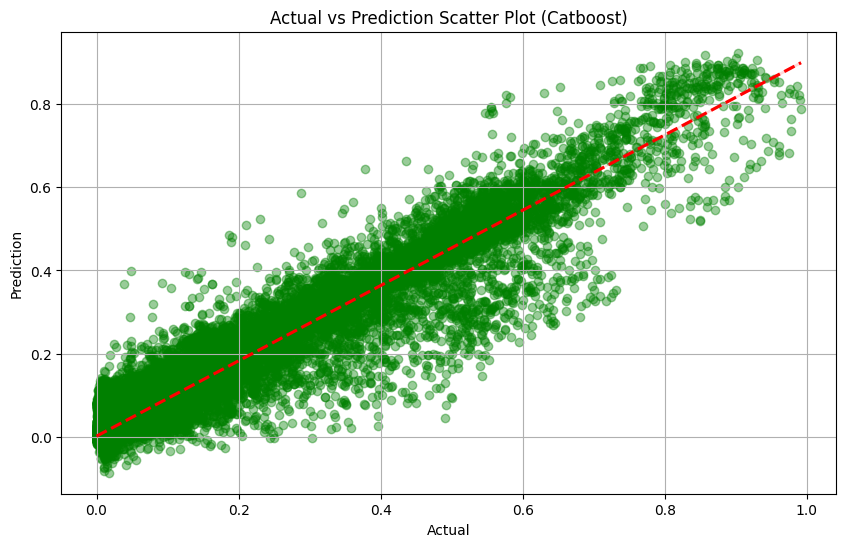

In [27]:
plt.figure(figsize=(10, 6))
sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha':0.4, 'color': 'Green'}, line_kws={'color': 'red', 'linestyle': '--'})
plt.title('Actual vs Prediction Scatter Plot (Catboost)')
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.grid(True)
plt.show()

# LightGBM


## Training

In [28]:
model = LGBMRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

metrics = {
    'MSE': mean_squared_error(y_test, y_pred),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
    'MAE': mean_absolute_error(y_test, y_pred),
    'R2': r2_score(y_test, y_pred),
}

for key, value in metrics.items():
    print(f"{key}: {value:.4f}")

metrics_dict['LGBM'] = metrics


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014970 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4264
[LightGBM] [Info] Number of data points in the train set: 1582305, number of used features: 29
[LightGBM] [Info] Start training from score 0.016729
MSE: 0.0002
RMSE: 0.0154
MAE: 0.0047
R2: 0.9482


## Feature Explaination

### Feature Importance

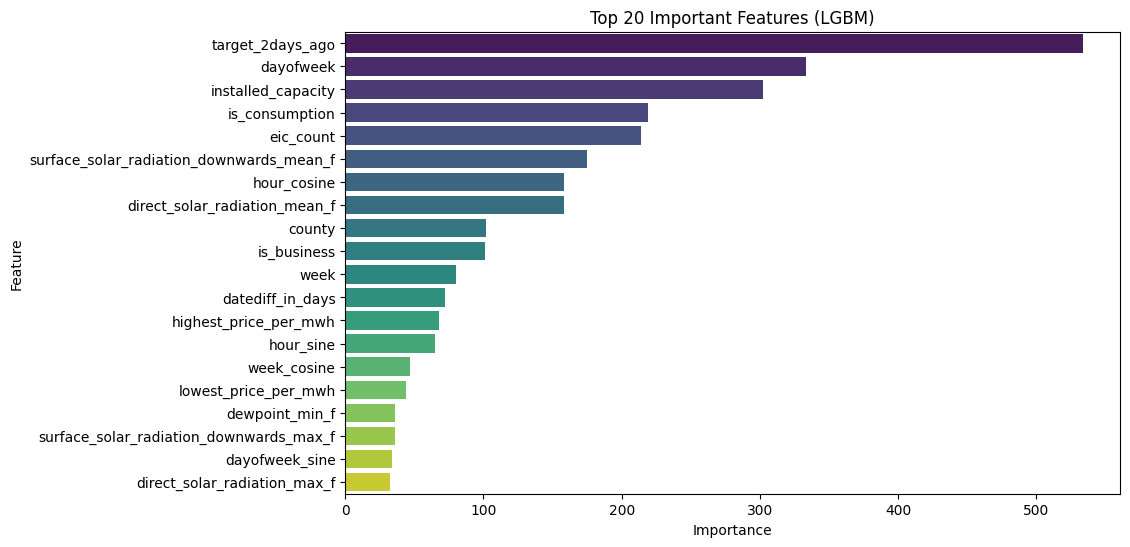

In [29]:
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': model.feature_importances_
})

top_20 = feature_importance.sort_values('Importance', ascending=False).head(20)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_20, palette='viridis')
plt.title('Top 20 Important Features (LGBM)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

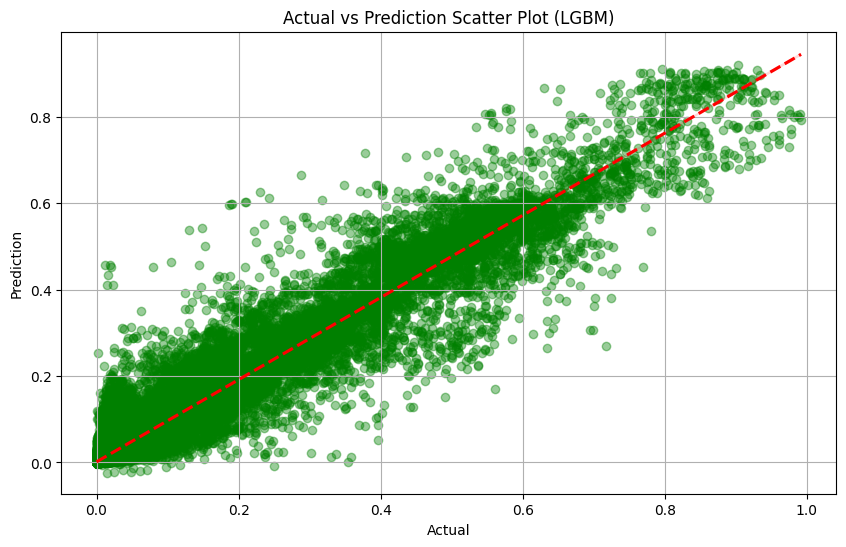

In [30]:
plt.figure(figsize=(10, 6))
sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha':0.4, 'color': 'Green'}, line_kws={'color': 'red', 'linestyle': '--'})
plt.title('Actual vs Prediction Scatter Plot (LGBM)')
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.grid(True)
plt.show()

# Ensamble


In [31]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Ridge

## Training

In [32]:
estimators = [
    ('xgboost', xgb.XGBRegressor(random_state=42, n_jobs = -1),),
    ('catboost', CatBoostRegressor(random_state=42, verbose = 0),),
    ('lgbm', LGBMRegressor(random_state=42, verbosity = -1),)
]
model = StackingRegressor(
    estimators=estimators, final_estimator=Ridge()
)


model.fit(X_train, y_train)

y_pred = model.predict(X_test)

metrics = {
    'MSE': mean_squared_error(y_test, y_pred),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
    'MAE': mean_absolute_error(y_test, y_pred),
    'R2': r2_score(y_test, y_pred),
}

for key, value in metrics.items():
    print(f"{key}: {value:.4f}")

metrics_dict['Ensamble'] = metrics


MSE: 0.0002
RMSE: 0.0146
MAE: 0.0045
R2: 0.9531


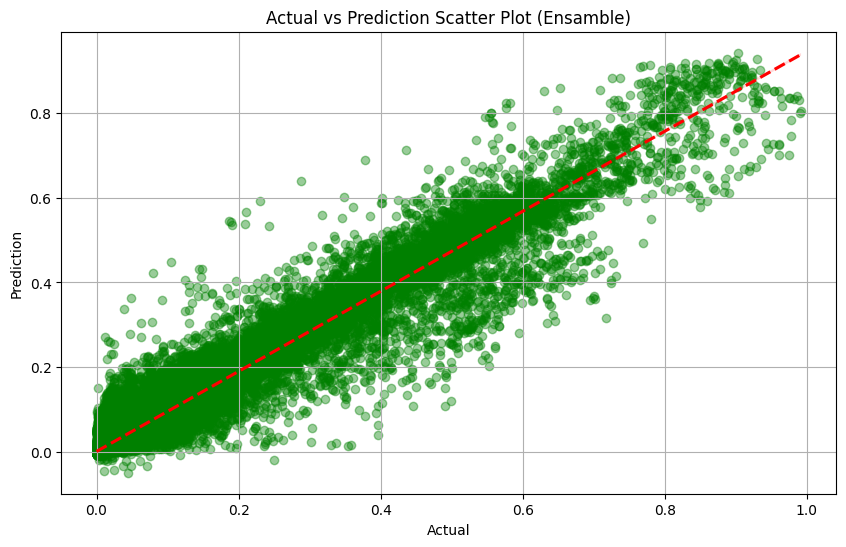

In [33]:
plt.figure(figsize=(10, 6))
sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha':0.4, 'color': 'Green'}, line_kws={'color': 'red', 'linestyle': '--'})
plt.title('Actual vs Prediction Scatter Plot (Ensamble)')
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.grid(True)
plt.show()

# Metrics

In [34]:
data = []
for model, metrics in metrics_dict.items():
    for metric, value in metrics.items():
        data.append({'Model': model, 'Metric': metric, 'Value': value})
metric_df = pd.DataFrame(data)

def plot_metric(metric_name, upper_limit = 1):
    """Helper function to plot individual metrics"""
    plt.figure(figsize=(8, 5))
    ax = sns.barplot(
        x='Model',
        y='Value',
        data=metric_df[metric_df['Metric'] == metric_name],
        palette=sns.color_palette("Set2"),
        saturation=0.8
    )

    ax.set_title(metric_name + "\n", fontsize=14)
    ax.set_ylim(0, upper_limit)
    ax.set_xlabel('')
    ax.set_ylabel('Score', fontsize=12)

    for container in ax.containers:
        ax.bar_label(container, fmt='%.5f', padding=3, fontsize=10)

    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

metric_names = ['MSE', 'RMSE', 'MAE', 'R2']

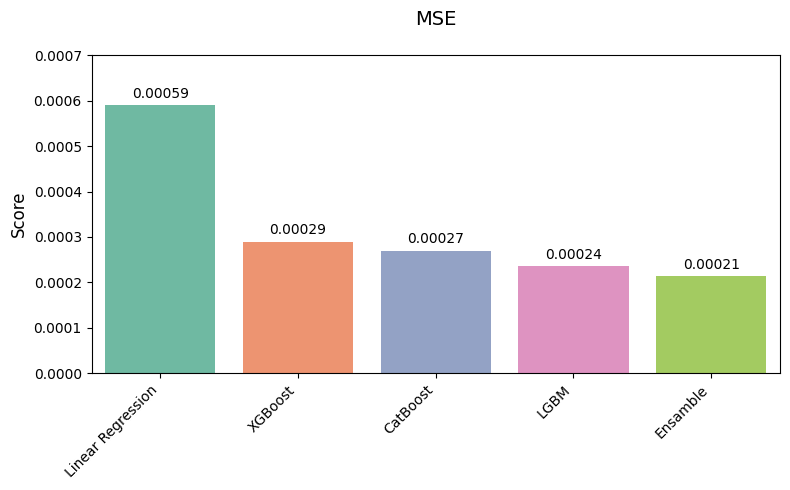

In [35]:
plot_metric(metric_names[0], upper_limit = 0.0007)

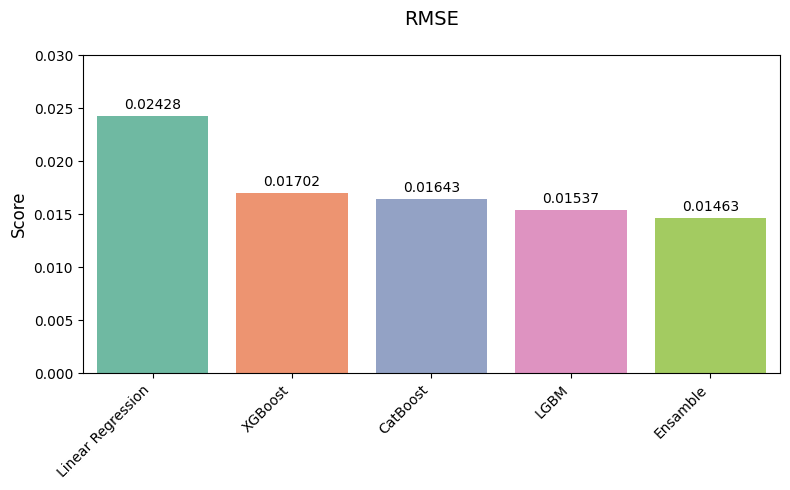

In [36]:
plot_metric(metric_names[1], upper_limit = 0.03)

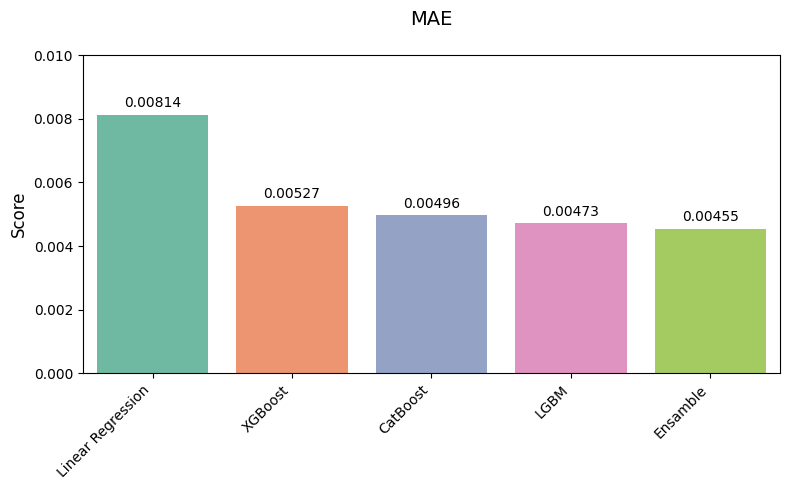

In [37]:
plot_metric(metric_names[2], upper_limit = 0.01)

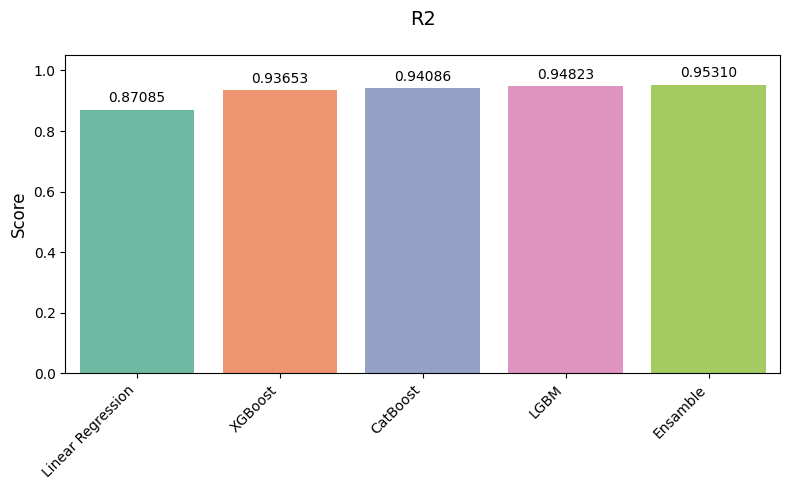

In [43]:
plot_metric(metric_names[3], upper_limit = 1.05)

In [39]:
metric_df.pivot(index="Model", columns="Metric", values="Value").sort_values(by = 'R2', ascending = False).reset_index()

Metric,Model,MAE,MSE,R2,RMSE
0,Ensamble,0.004548,0.000214,0.953096,0.014633
1,LGBM,0.004728,0.000236,0.948229,0.015373
2,CatBoost,0.004964,0.000270,0.940857,0.016431
3,XGBoost,0.005273,0.000290,0.936532,0.017021
4,Linear Regression,0.008137,0.000590,0.870852,0.024281
